# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [6]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["figure.dpi"] = 300

In [2]:
df = pd.read_csv("data/cancer_classification.csv")

## EDA

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


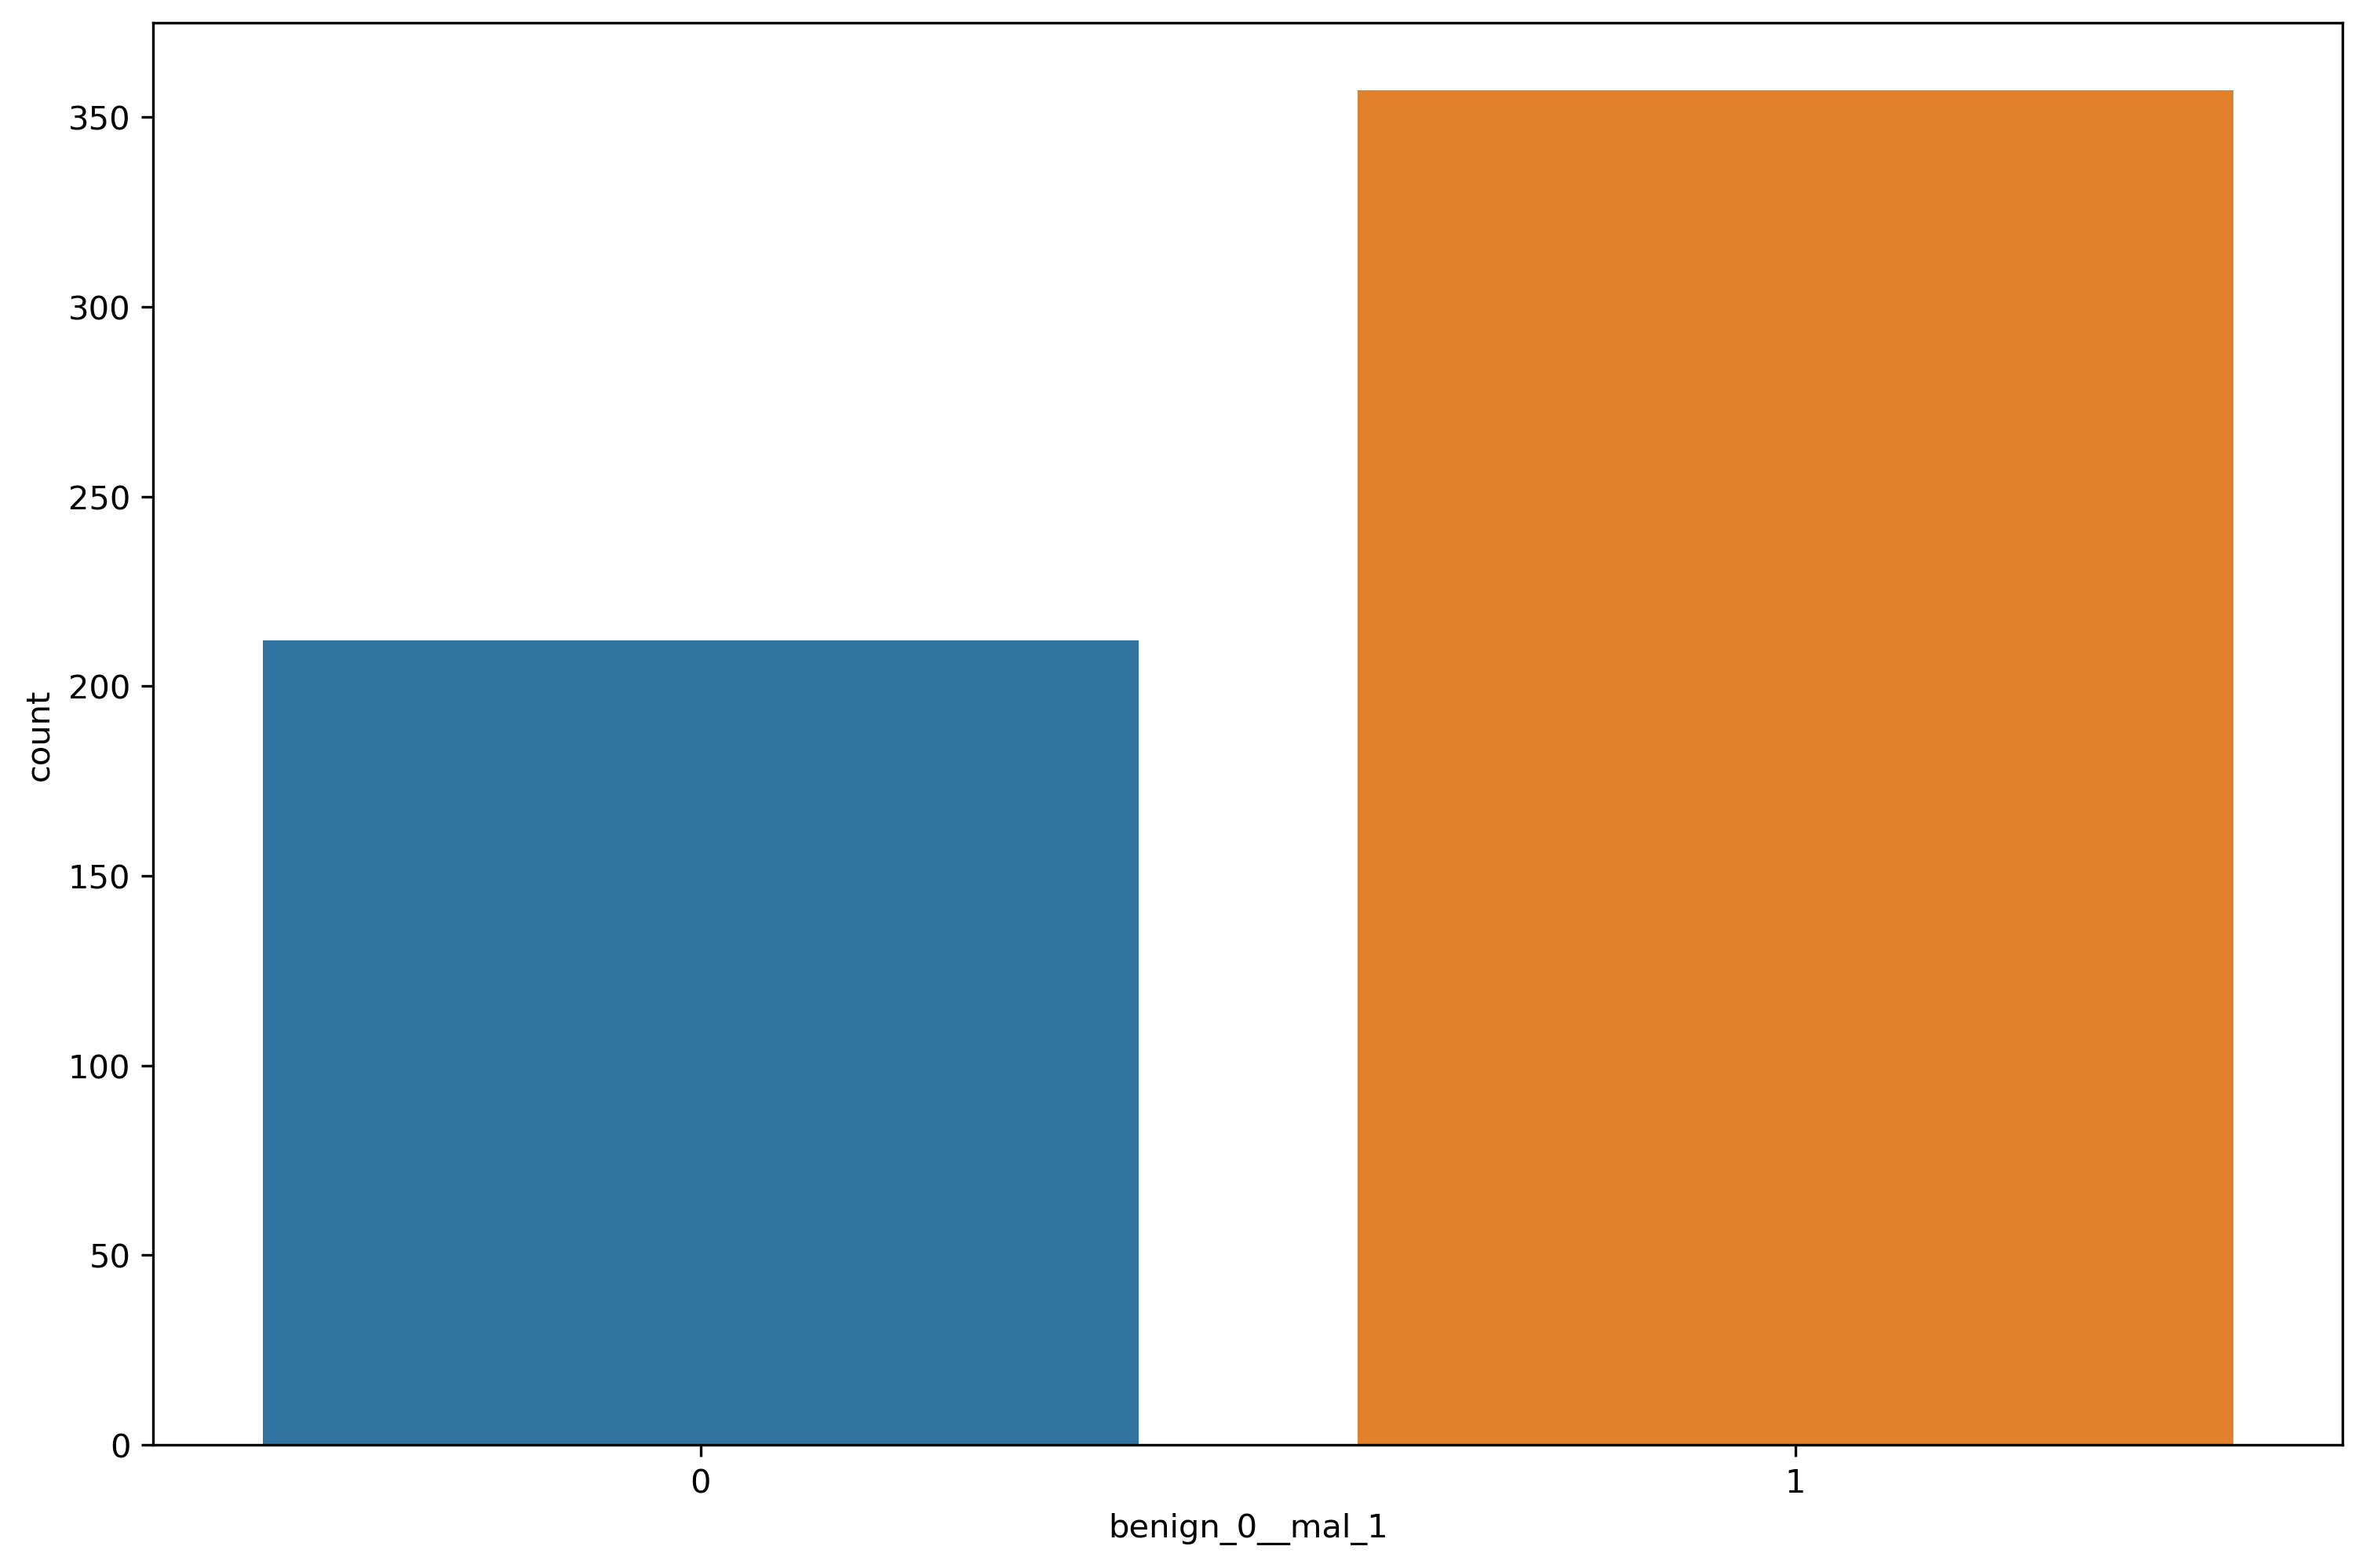

In [7]:
sns.countplot(x="benign_0__mal_1", data=df);

We can see that we have more cases of malignant cases than benign, and we can also observe that their are relatively balanced.

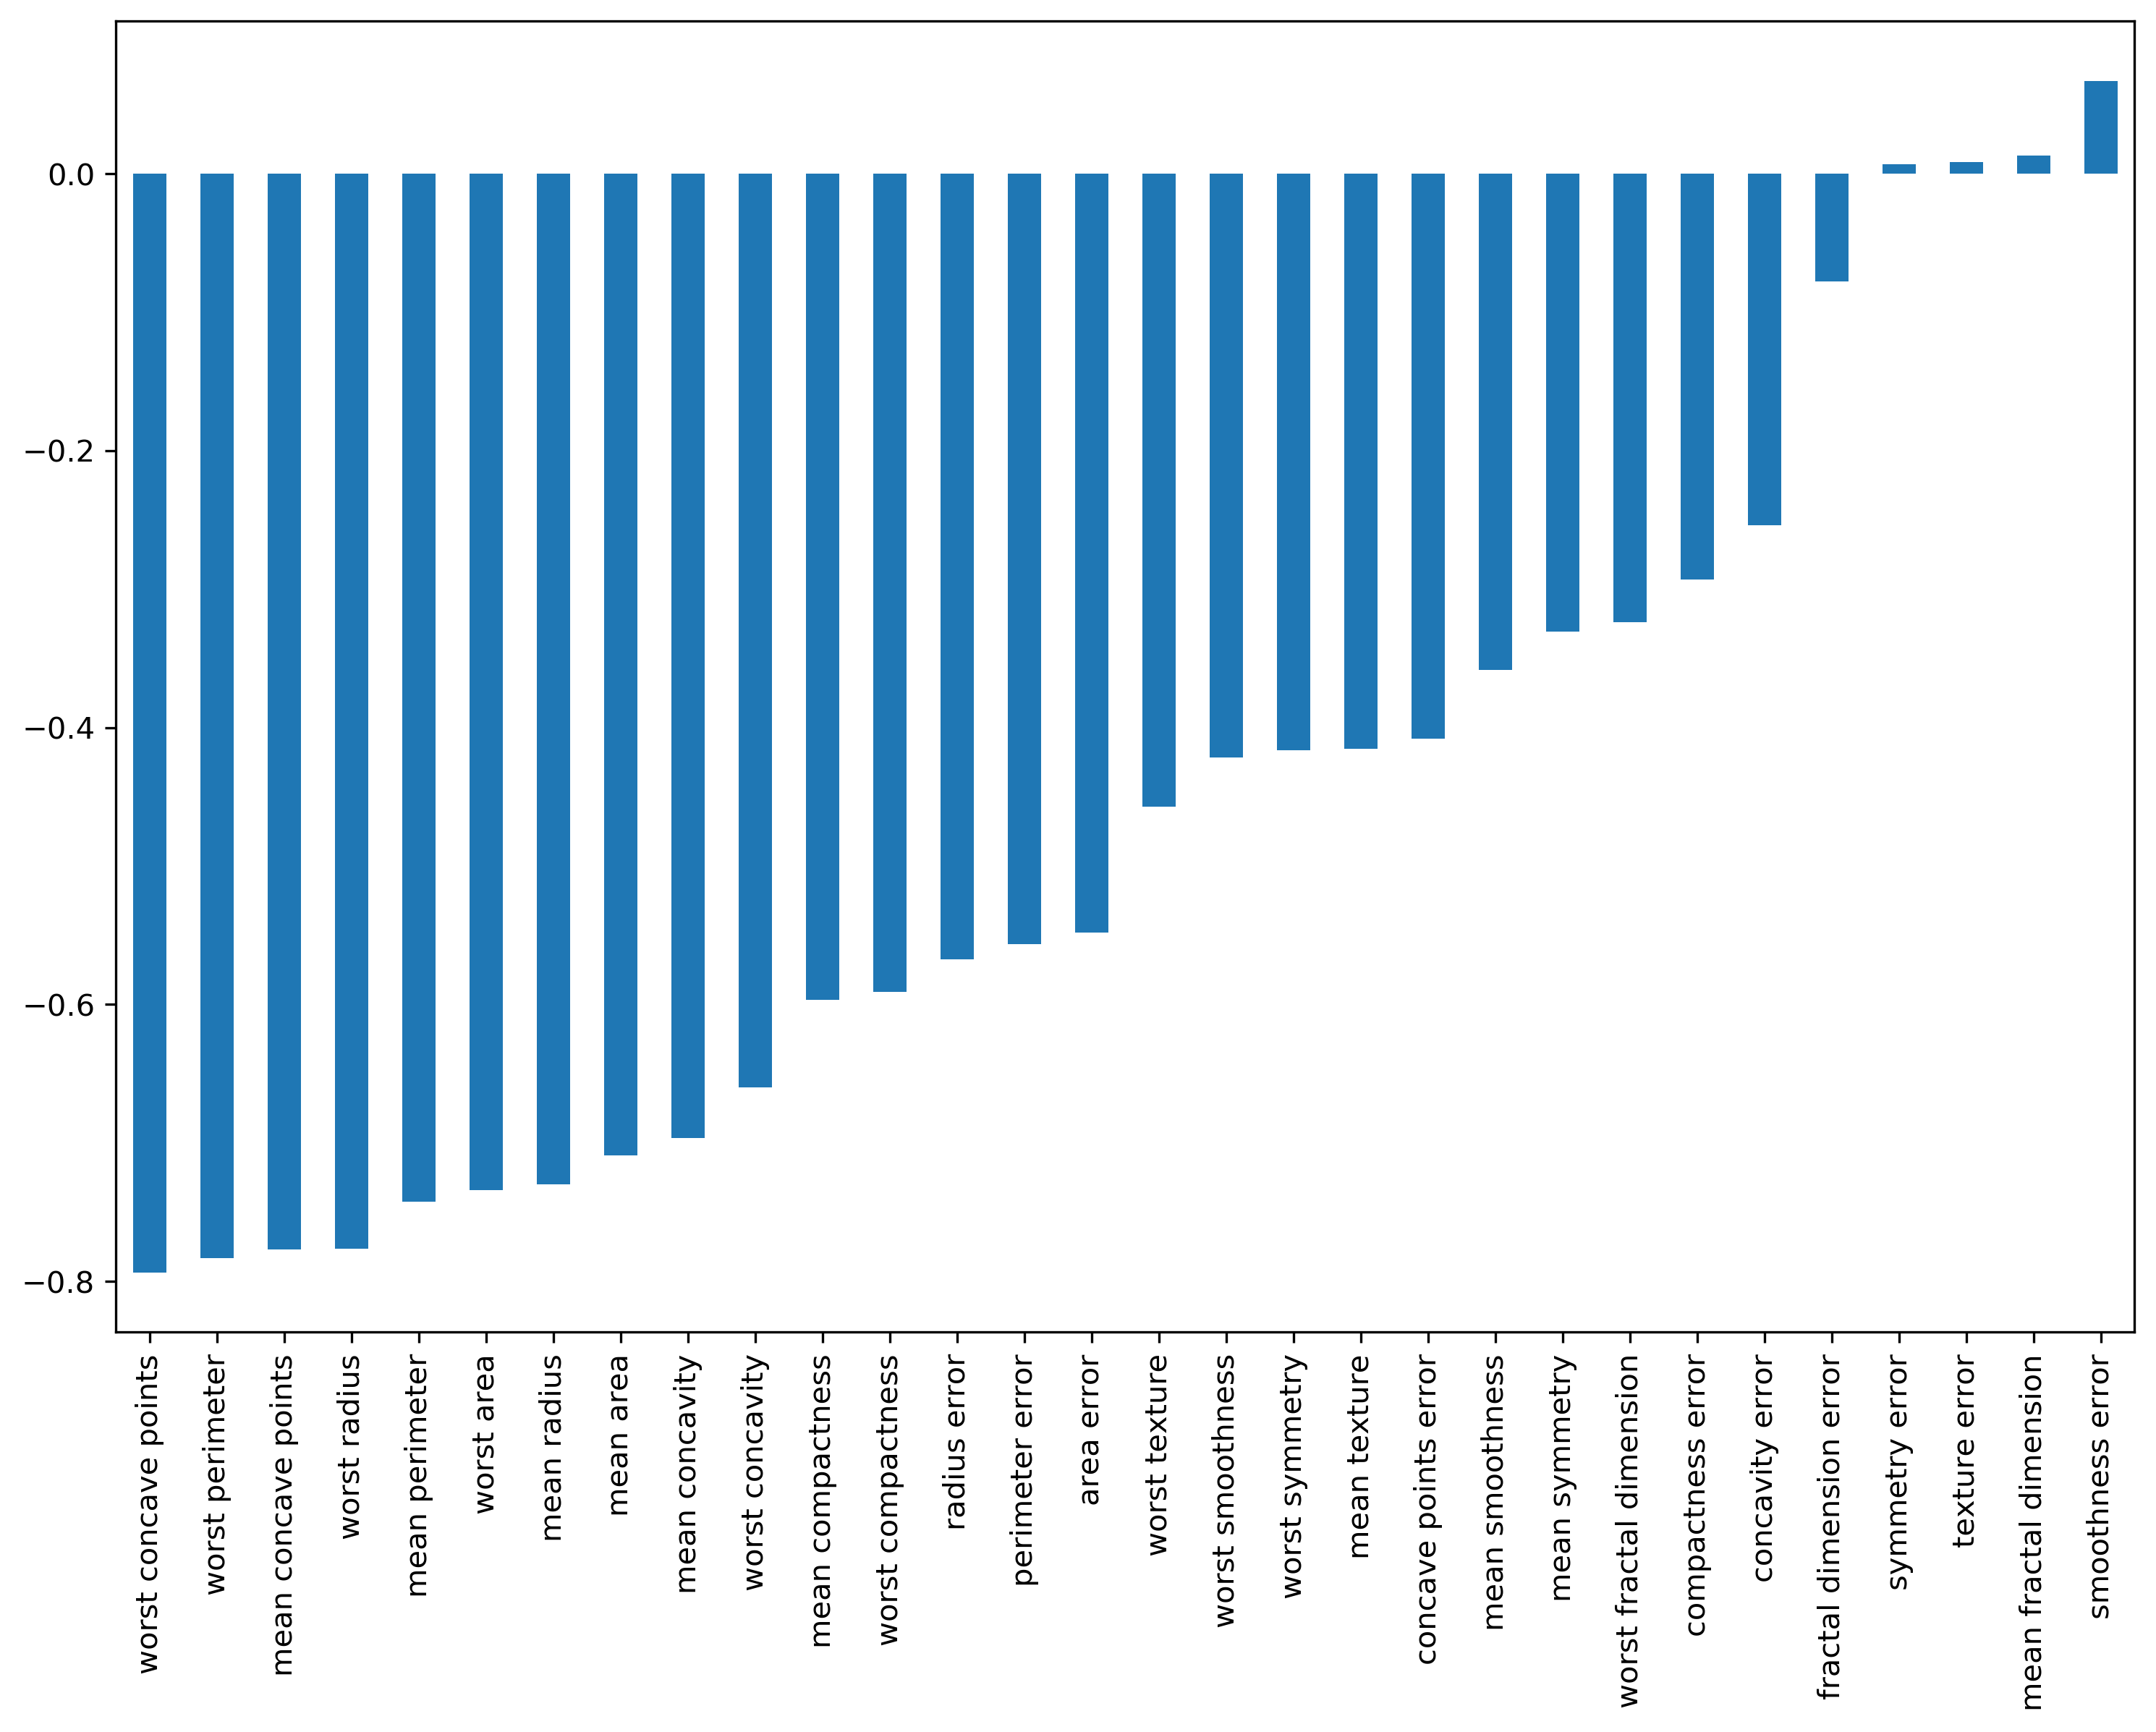

In [12]:
df.corr()["benign_0__mal_1"].iloc[:-1].sort_values().plot(kind="bar");

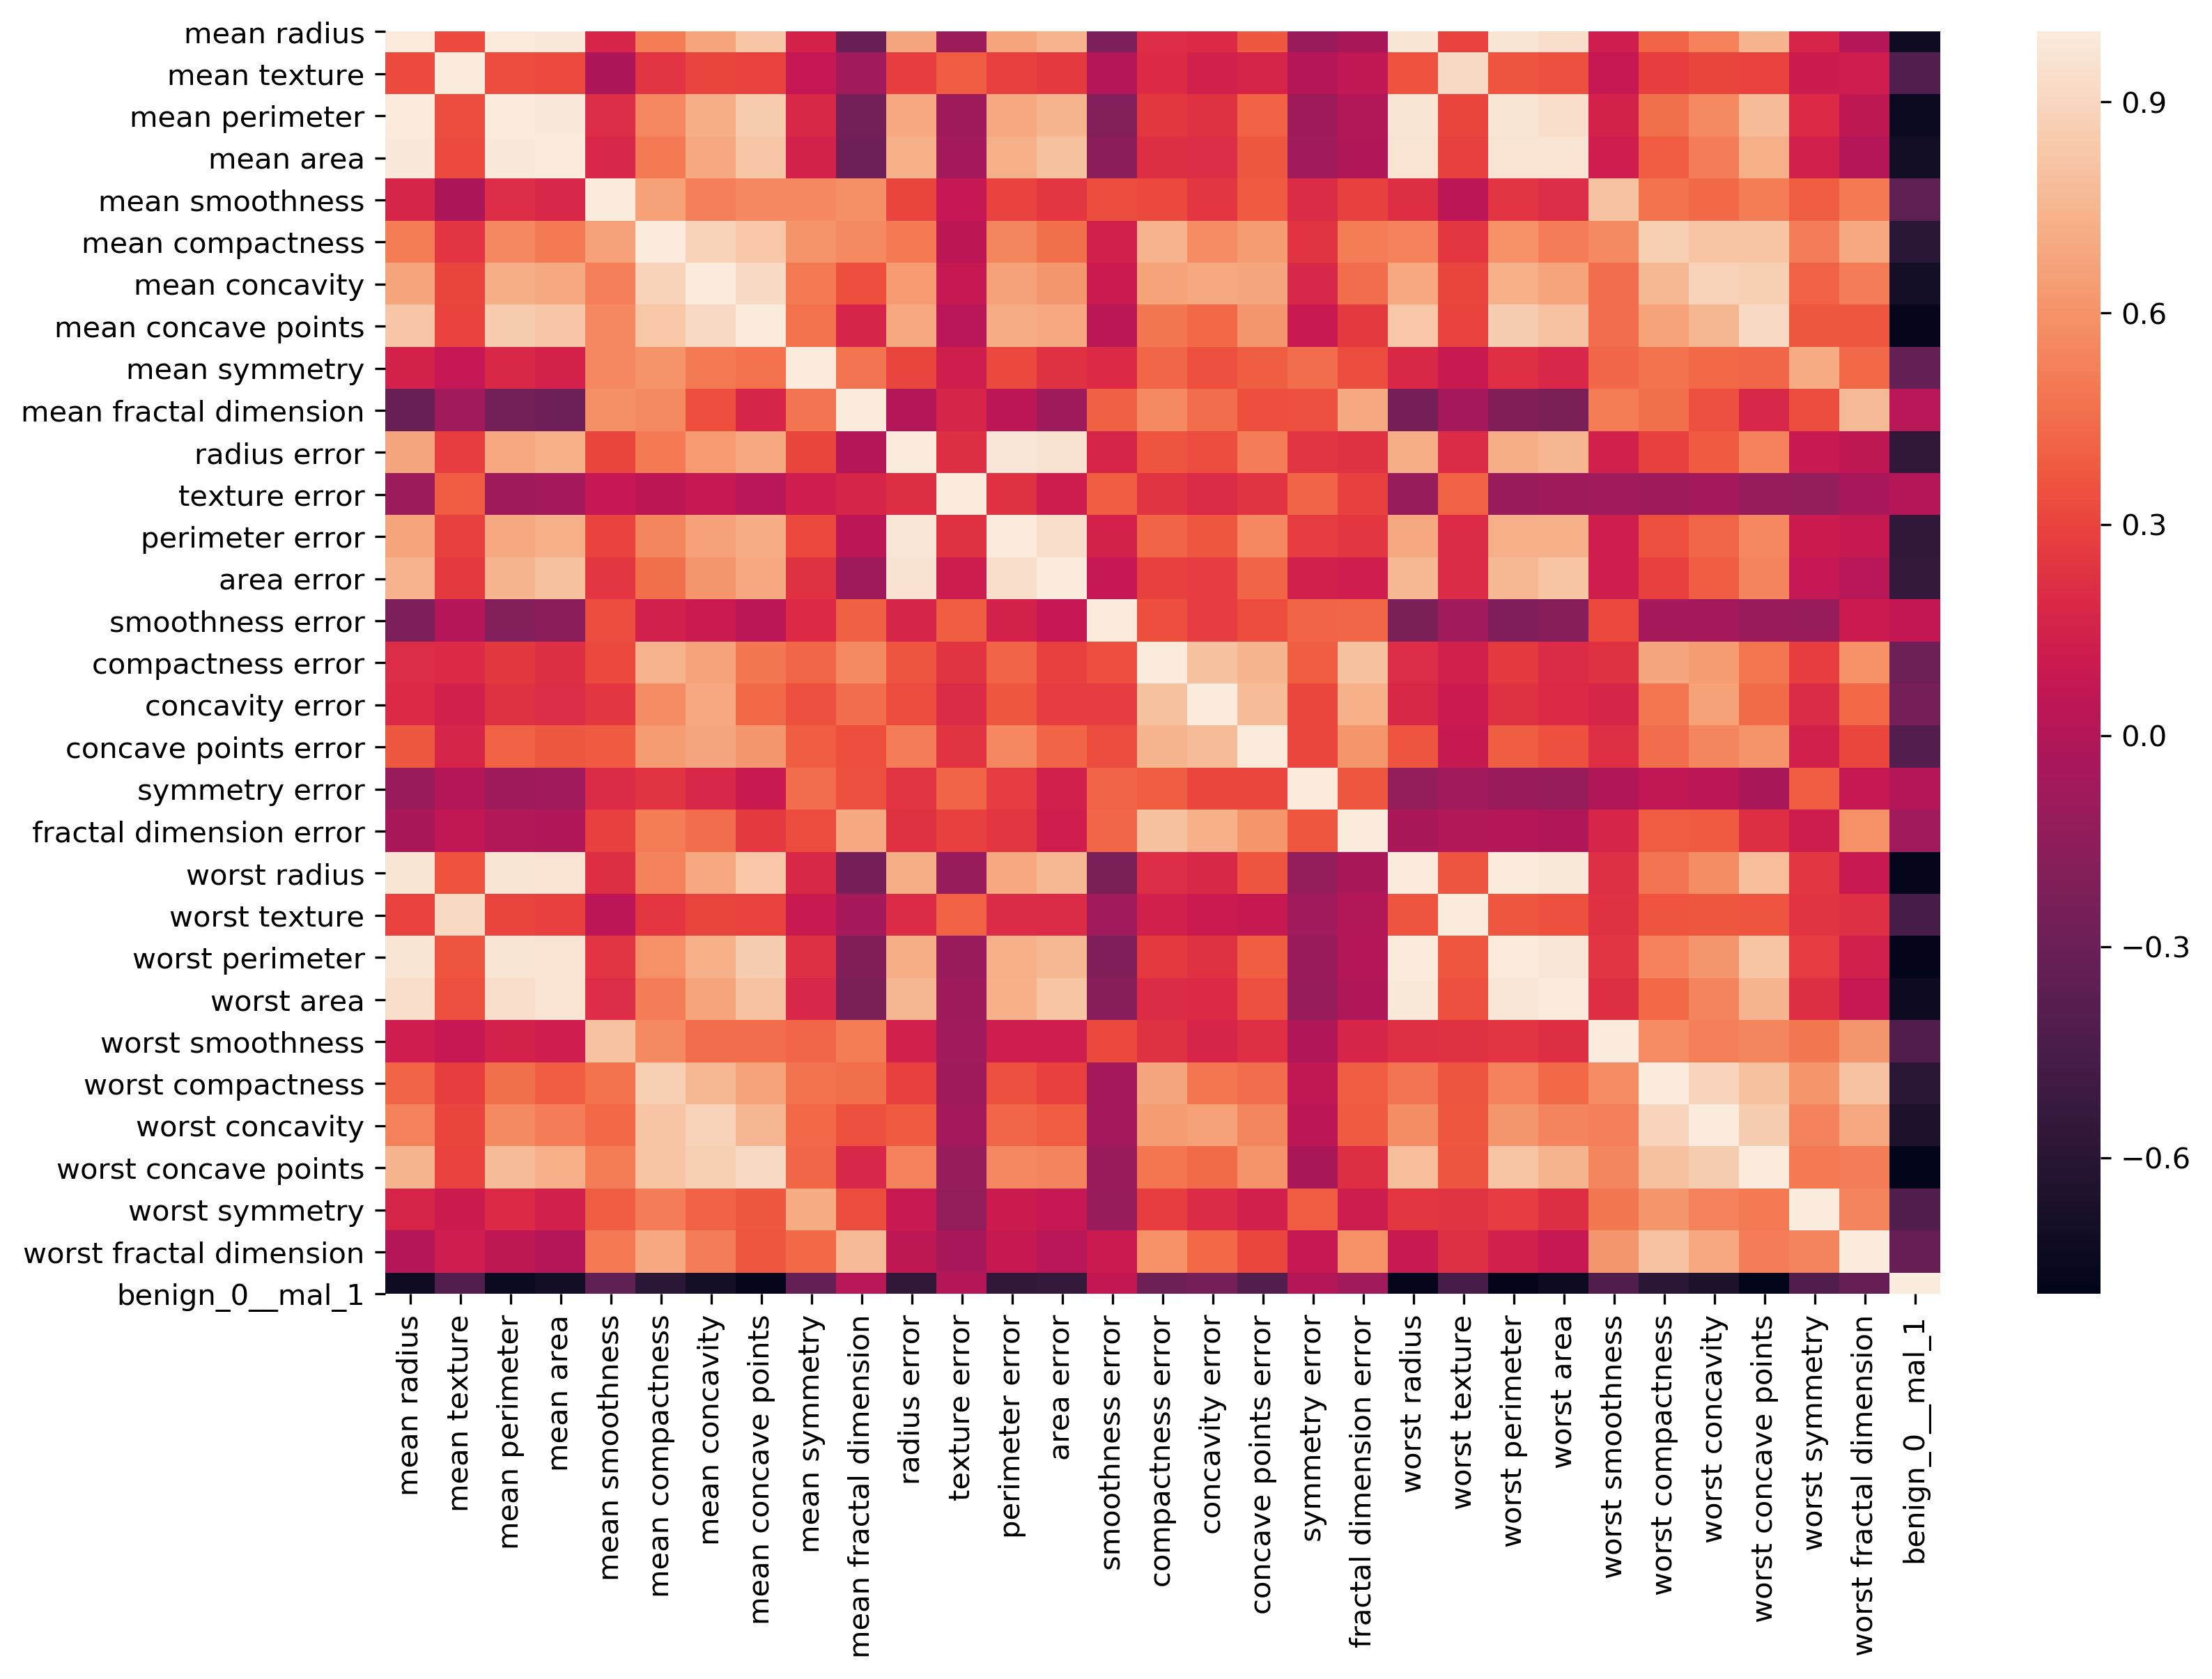

In [14]:
sns.heatmap(df.corr());

We have several variable with highly negative correlations which tells us that we can predict the target variable.

## Features

In [16]:
X = df.drop("benign_0__mal_1", axis=1).values
y = df["benign_0__mal_1"].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=101)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
X_train = scaler.fit_transform(X_train)

In [29]:
X_test = scaler.transform(X_test)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [31]:
X_train.shape

(426, 30)

In [32]:
model = Sequential()

model.add(Dense(30, activation="relu"))
# We reduce the number of neurons
model.add(Dense(15, activation="relu"))
# For our last layer(Prediction) we select the sigmoid for binary classification
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
             loss="binary_crossentropy")

In [33]:
# We will choose an high number of epochs to check for overfitting
model.fit(x=X_train, y=y_train,
         epochs=600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6777 - val_loss: 0.6577
Epoch 2/600
426/426 [==============================] - 0s 84us/sample - loss: 0.6476 - val_loss: 0.6296
Epoch 3/600
426/426 [==============================] - 0s 80us/sample - loss: 0.6178 - val_loss: 0.5956
Epoch 4/600
426/426 [==============================] - 0s 75us/sample - loss: 0.5830 - val_loss: 0.5553
Epoch 5/600
426/426 [==============================] - 0s 74us/sample - loss: 0.5423 - val_loss: 0.5067
Epoch 6/600
426/426 [==============================] - 0s 77us/sample - loss: 0.4898 - val_loss: 0.4426
Epoch 7/600
426/426 [==============================] - 0s 68us/sample - loss: 0.4273 - val_loss: 0.3829
Epoch 8/600
426/426 [==============================] - 0s 75us/sample - loss: 0.3763 - val_loss: 0.3382
Epoch 9/600
426/426 [==============================] - 0s 80us/sample - loss: 0.3348 - val_loss: 0.3015
Epoch 10/600
426/42

426/426 [==============================] - 0s 47us/sample - loss: 0.0529 - val_loss: 0.1252
Epoch 79/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0510 - val_loss: 0.1199
Epoch 80/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0515 - val_loss: 0.1222
Epoch 81/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0510 - val_loss: 0.1223
Epoch 82/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0511 - val_loss: 0.1226
Epoch 83/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0511 - val_loss: 0.1267
Epoch 84/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0514 - val_loss: 0.1216
Epoch 85/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0505 - val_loss: 0.1228
Epoch 86/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0504 - val_loss: 0.1305
Epoch 87/600
426/426 [==============================] - 0s 47us/samp

426/426 [==============================] - 0s 66us/sample - loss: 0.0407 - val_loss: 0.1357
Epoch 156/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0408 - val_loss: 0.1410
Epoch 157/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0415 - val_loss: 0.1429
Epoch 158/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0416 - val_loss: 0.1420
Epoch 159/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0422 - val_loss: 0.1403
Epoch 160/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0421 - val_loss: 0.1406
Epoch 161/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0418 - val_loss: 0.1456
Epoch 162/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0418 - val_loss: 0.1369
Epoch 163/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0477 - val_loss: 0.1495
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 47us/sample - loss: 0.0331 - val_loss: 0.1509
Epoch 233/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0341 - val_loss: 0.1480
Epoch 234/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0348 - val_loss: 0.1472
Epoch 235/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0355 - val_loss: 0.1547
Epoch 236/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0357 - val_loss: 0.1460
Epoch 237/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0341 - val_loss: 0.1440
Epoch 238/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0411 - val_loss: 0.1453
Epoch 239/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0329 - val_loss: 0.1497
Epoch 240/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0365 - val_loss: 0.1549
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 73us/sample - loss: 0.0274 - val_loss: 0.1706
Epoch 310/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0285 - val_loss: 0.1597
Epoch 311/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0290 - val_loss: 0.1562
Epoch 312/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0276 - val_loss: 0.1660
Epoch 313/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0278 - val_loss: 0.1670
Epoch 314/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0292 - val_loss: 0.1597
Epoch 315/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0272 - val_loss: 0.1712
Epoch 316/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0286 - val_loss: 0.1696
Epoch 317/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0288 - val_loss: 0.1653
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 49us/sample - loss: 0.0261 - val_loss: 0.1747
Epoch 387/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0231 - val_loss: 0.1729
Epoch 388/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0257 - val_loss: 0.1968
Epoch 389/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0261 - val_loss: 0.1694
Epoch 390/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0236 - val_loss: 0.1979
Epoch 391/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0225 - val_loss: 0.1729
Epoch 392/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0219 - val_loss: 0.1842
Epoch 393/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0247 - val_loss: 0.1853
Epoch 394/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0253 - val_loss: 0.1701
Epoch 395/600
426/426 [==============================] - 0s

426/426 [==============================] - 0s 80us/sample - loss: 0.0206 - val_loss: 0.1895
Epoch 464/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0270 - val_loss: 0.1817
Epoch 465/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0217 - val_loss: 0.1986
Epoch 466/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0186 - val_loss: 0.2024
Epoch 467/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0189 - val_loss: 0.2043
Epoch 468/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0221 - val_loss: 0.1900
Epoch 469/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0293 - val_loss: 0.2185
Epoch 470/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0228 - val_loss: 0.1893
Epoch 471/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0234 - val_loss: 0.1994
Epoch 472/600
426/426 [==============================] - 0s

426/426 [==============================] - 0s 49us/sample - loss: 0.0149 - val_loss: 0.2273
Epoch 541/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0165 - val_loss: 0.2089
Epoch 542/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0138 - val_loss: 0.2094
Epoch 543/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0143 - val_loss: 0.2258
Epoch 544/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0153 - val_loss: 0.2117
Epoch 545/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0153 - val_loss: 0.2079
Epoch 546/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0141 - val_loss: 0.2191
Epoch 547/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0178 - val_loss: 0.2048
Epoch 548/600
426/426 [==============================] - 0s 48us/sample - loss: 0.0143 - val_loss: 0.2180
Epoch 549/600
426/426 [==============================] - 0s 

In [34]:
losses = pd.DataFrame(model.history.history)

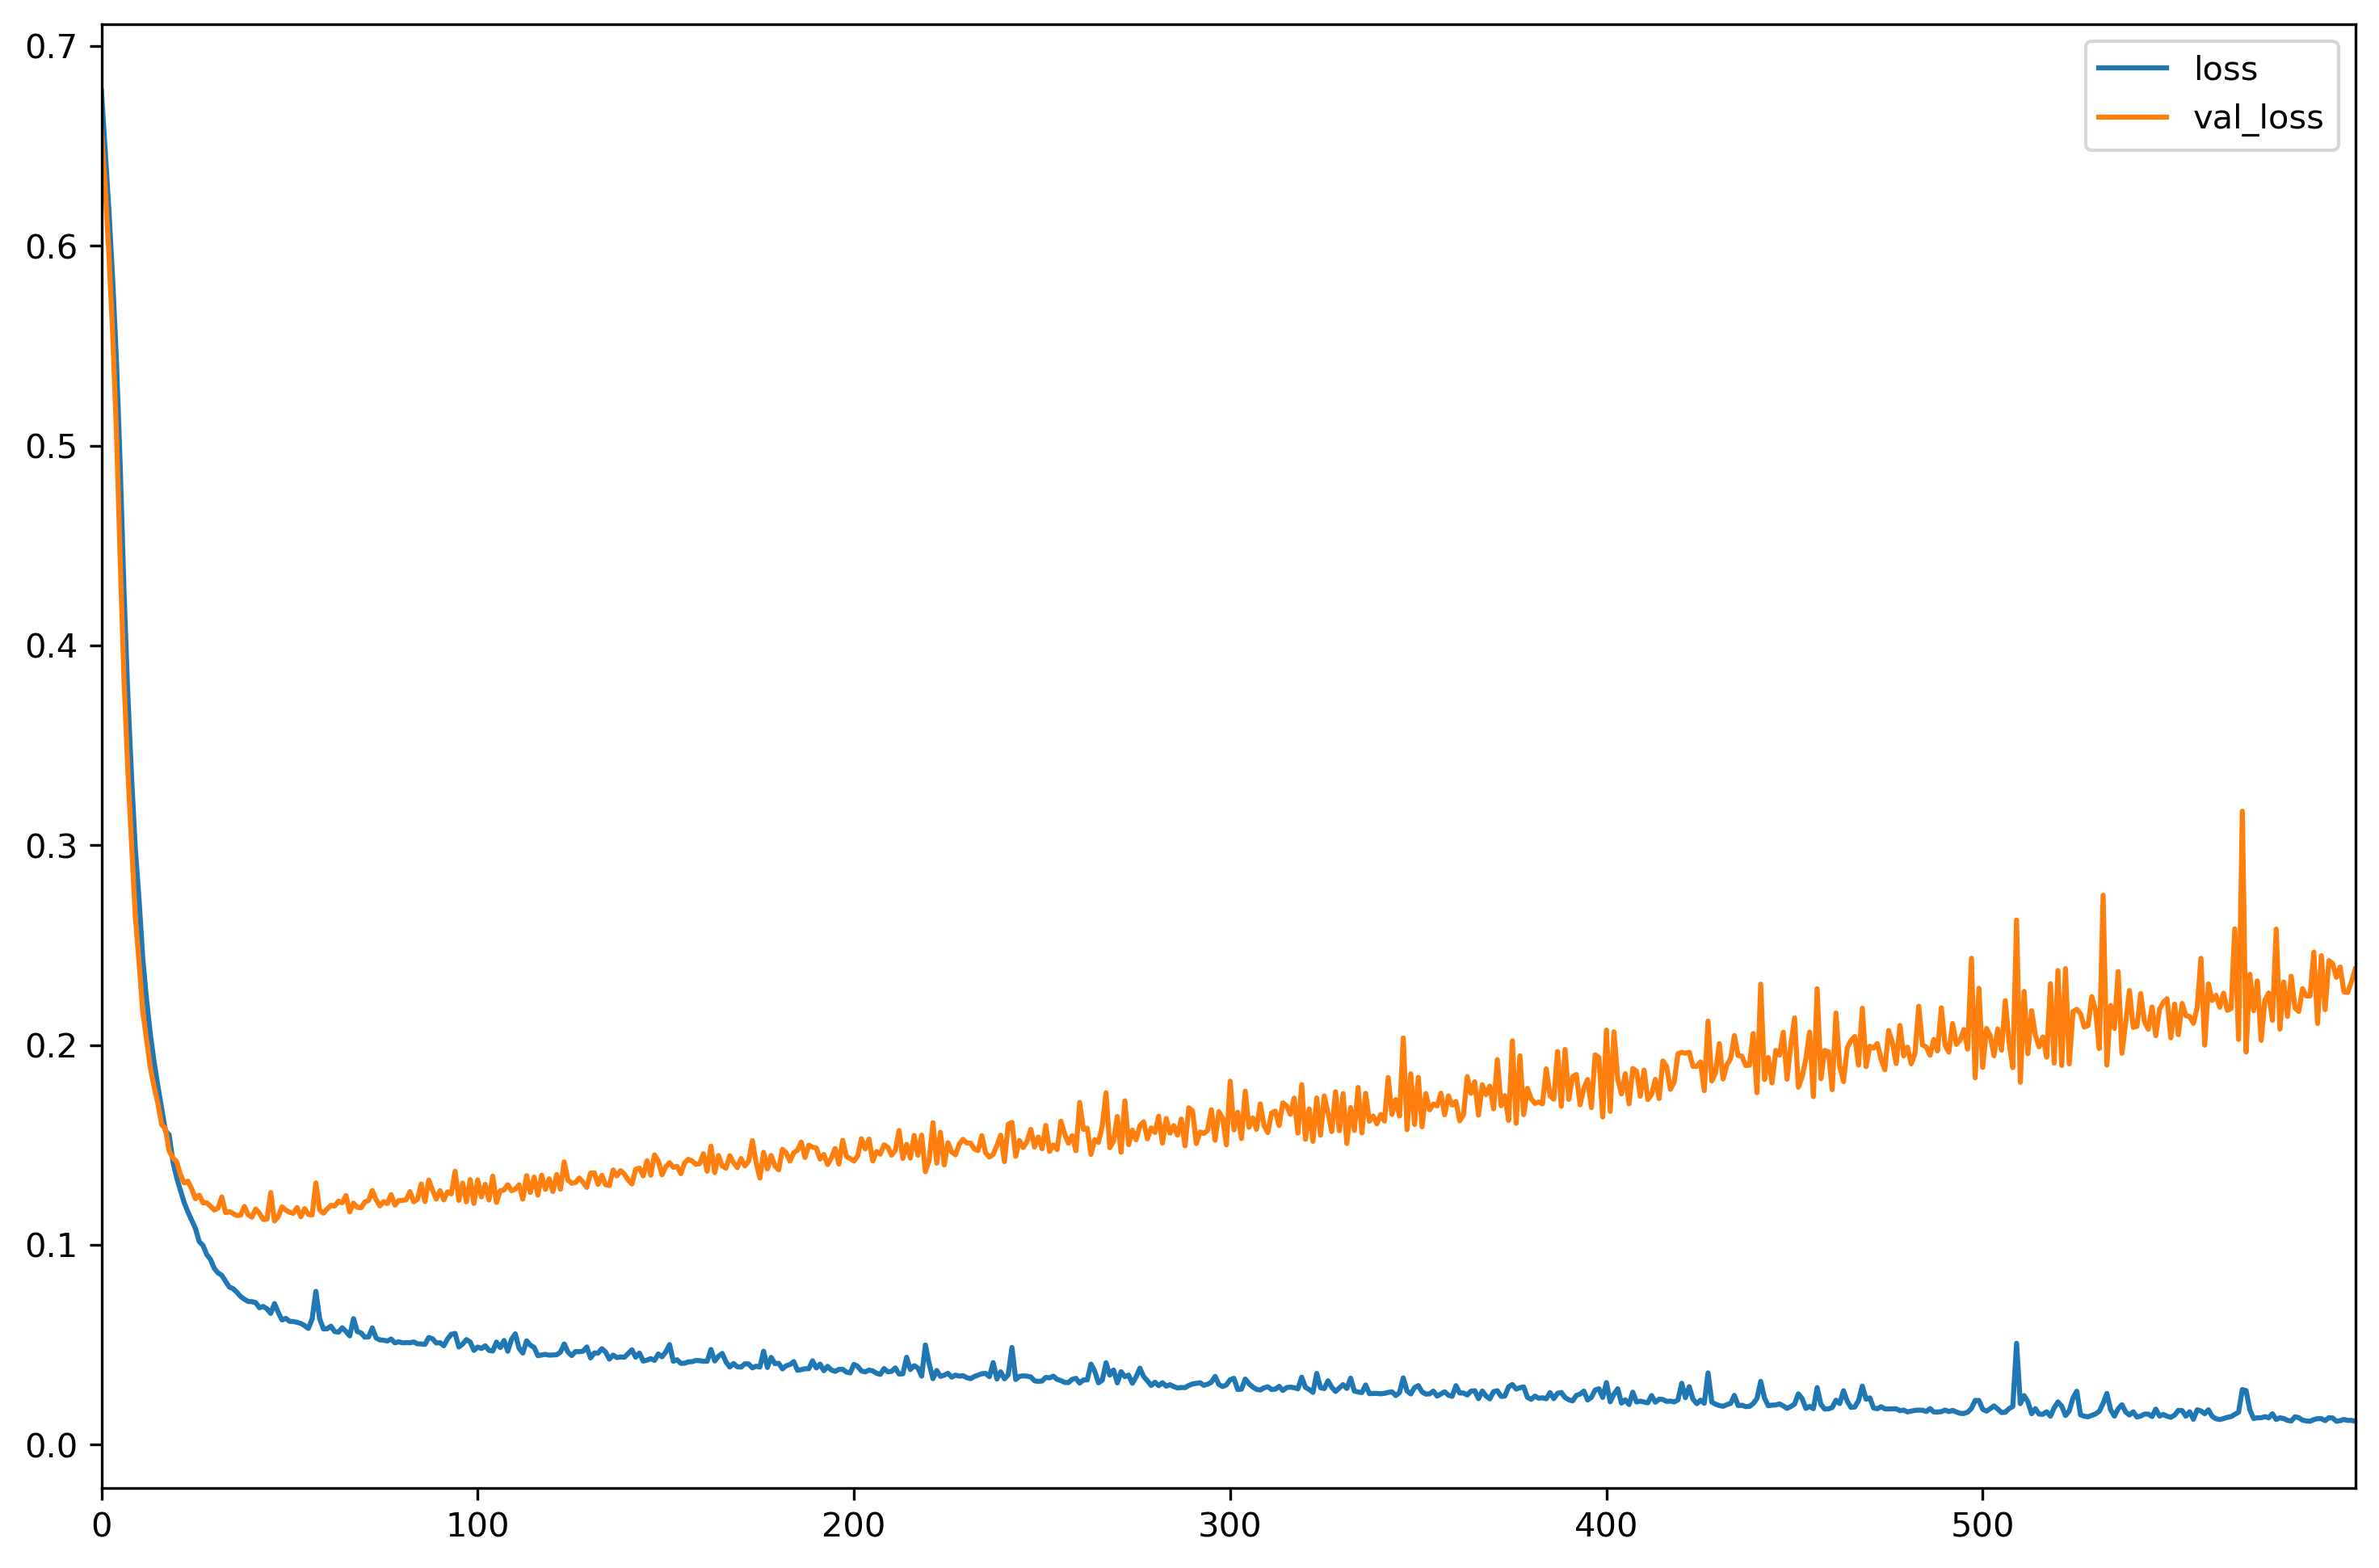

In [36]:
losses.plot();

This is an example of overfitting. We can notice that both the train and validation loss are decreasing. However, at a certain point, the train loss is still going down while the validation loss starts increasing. This tells us we are overfitting to our training data. We need to reduce the number of epochs.

To solve this we will use **early stopping**.

In [37]:
model = Sequential()

model.add(Dense(30, activation="relu"))
# We reduce the number of neurons
model.add(Dense(15, activation="relu"))
# For our last layer(Prediction) we select the sigmoid for binary classification
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
             loss="binary_crossentropy")

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor="val_loss", 
                           mode="min", 
                          verbose=1,
                          patience=25) # Number of epochs to run after the min

In [40]:
model.fit(x=X_train, y=y_train,
         epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6877 - val_loss: 0.6617
Epoch 2/600
426/426 [==============================] - 0s 59us/sample - loss: 0.6523 - val_loss: 0.6279
Epoch 3/600
426/426 [==============================] - 0s 56us/sample - loss: 0.6157 - val_loss: 0.5870
Epoch 4/600
426/426 [==============================] - 0s 47us/sample - loss: 0.5732 - val_loss: 0.5422
Epoch 5/600
426/426 [==============================] - 0s 49us/sample - loss: 0.5236 - val_loss: 0.4849
Epoch 6/600
426/426 [==============================] - 0s 49us/sample - loss: 0.4643 - val_loss: 0.4244
Epoch 7/600
426/426 [==============================] - 0s 49us/sample - loss: 0.4112 - val_loss: 0.3728
Epoch 8/600
426/426 [==============================] - 0s 49us/sample - loss: 0.3641 - val_loss: 0.3295
Epoch 9/600
426/426 [==============================] - 0s 49us/sample - loss: 0.3240 - val_loss: 0.2935
Epoch 10/600
426/42

426/426 [==============================] - 0s 61us/sample - loss: 0.0517 - val_loss: 0.1166
Epoch 79/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0514 - val_loss: 0.1198
Epoch 80/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0508 - val_loss: 0.1164
Epoch 81/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0504 - val_loss: 0.1244
Epoch 82/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0540 - val_loss: 0.1158
Epoch 83/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0513 - val_loss: 0.1297
Epoch 00083: early stopping


Even with 600 epochs the model stopped with the early stopping.

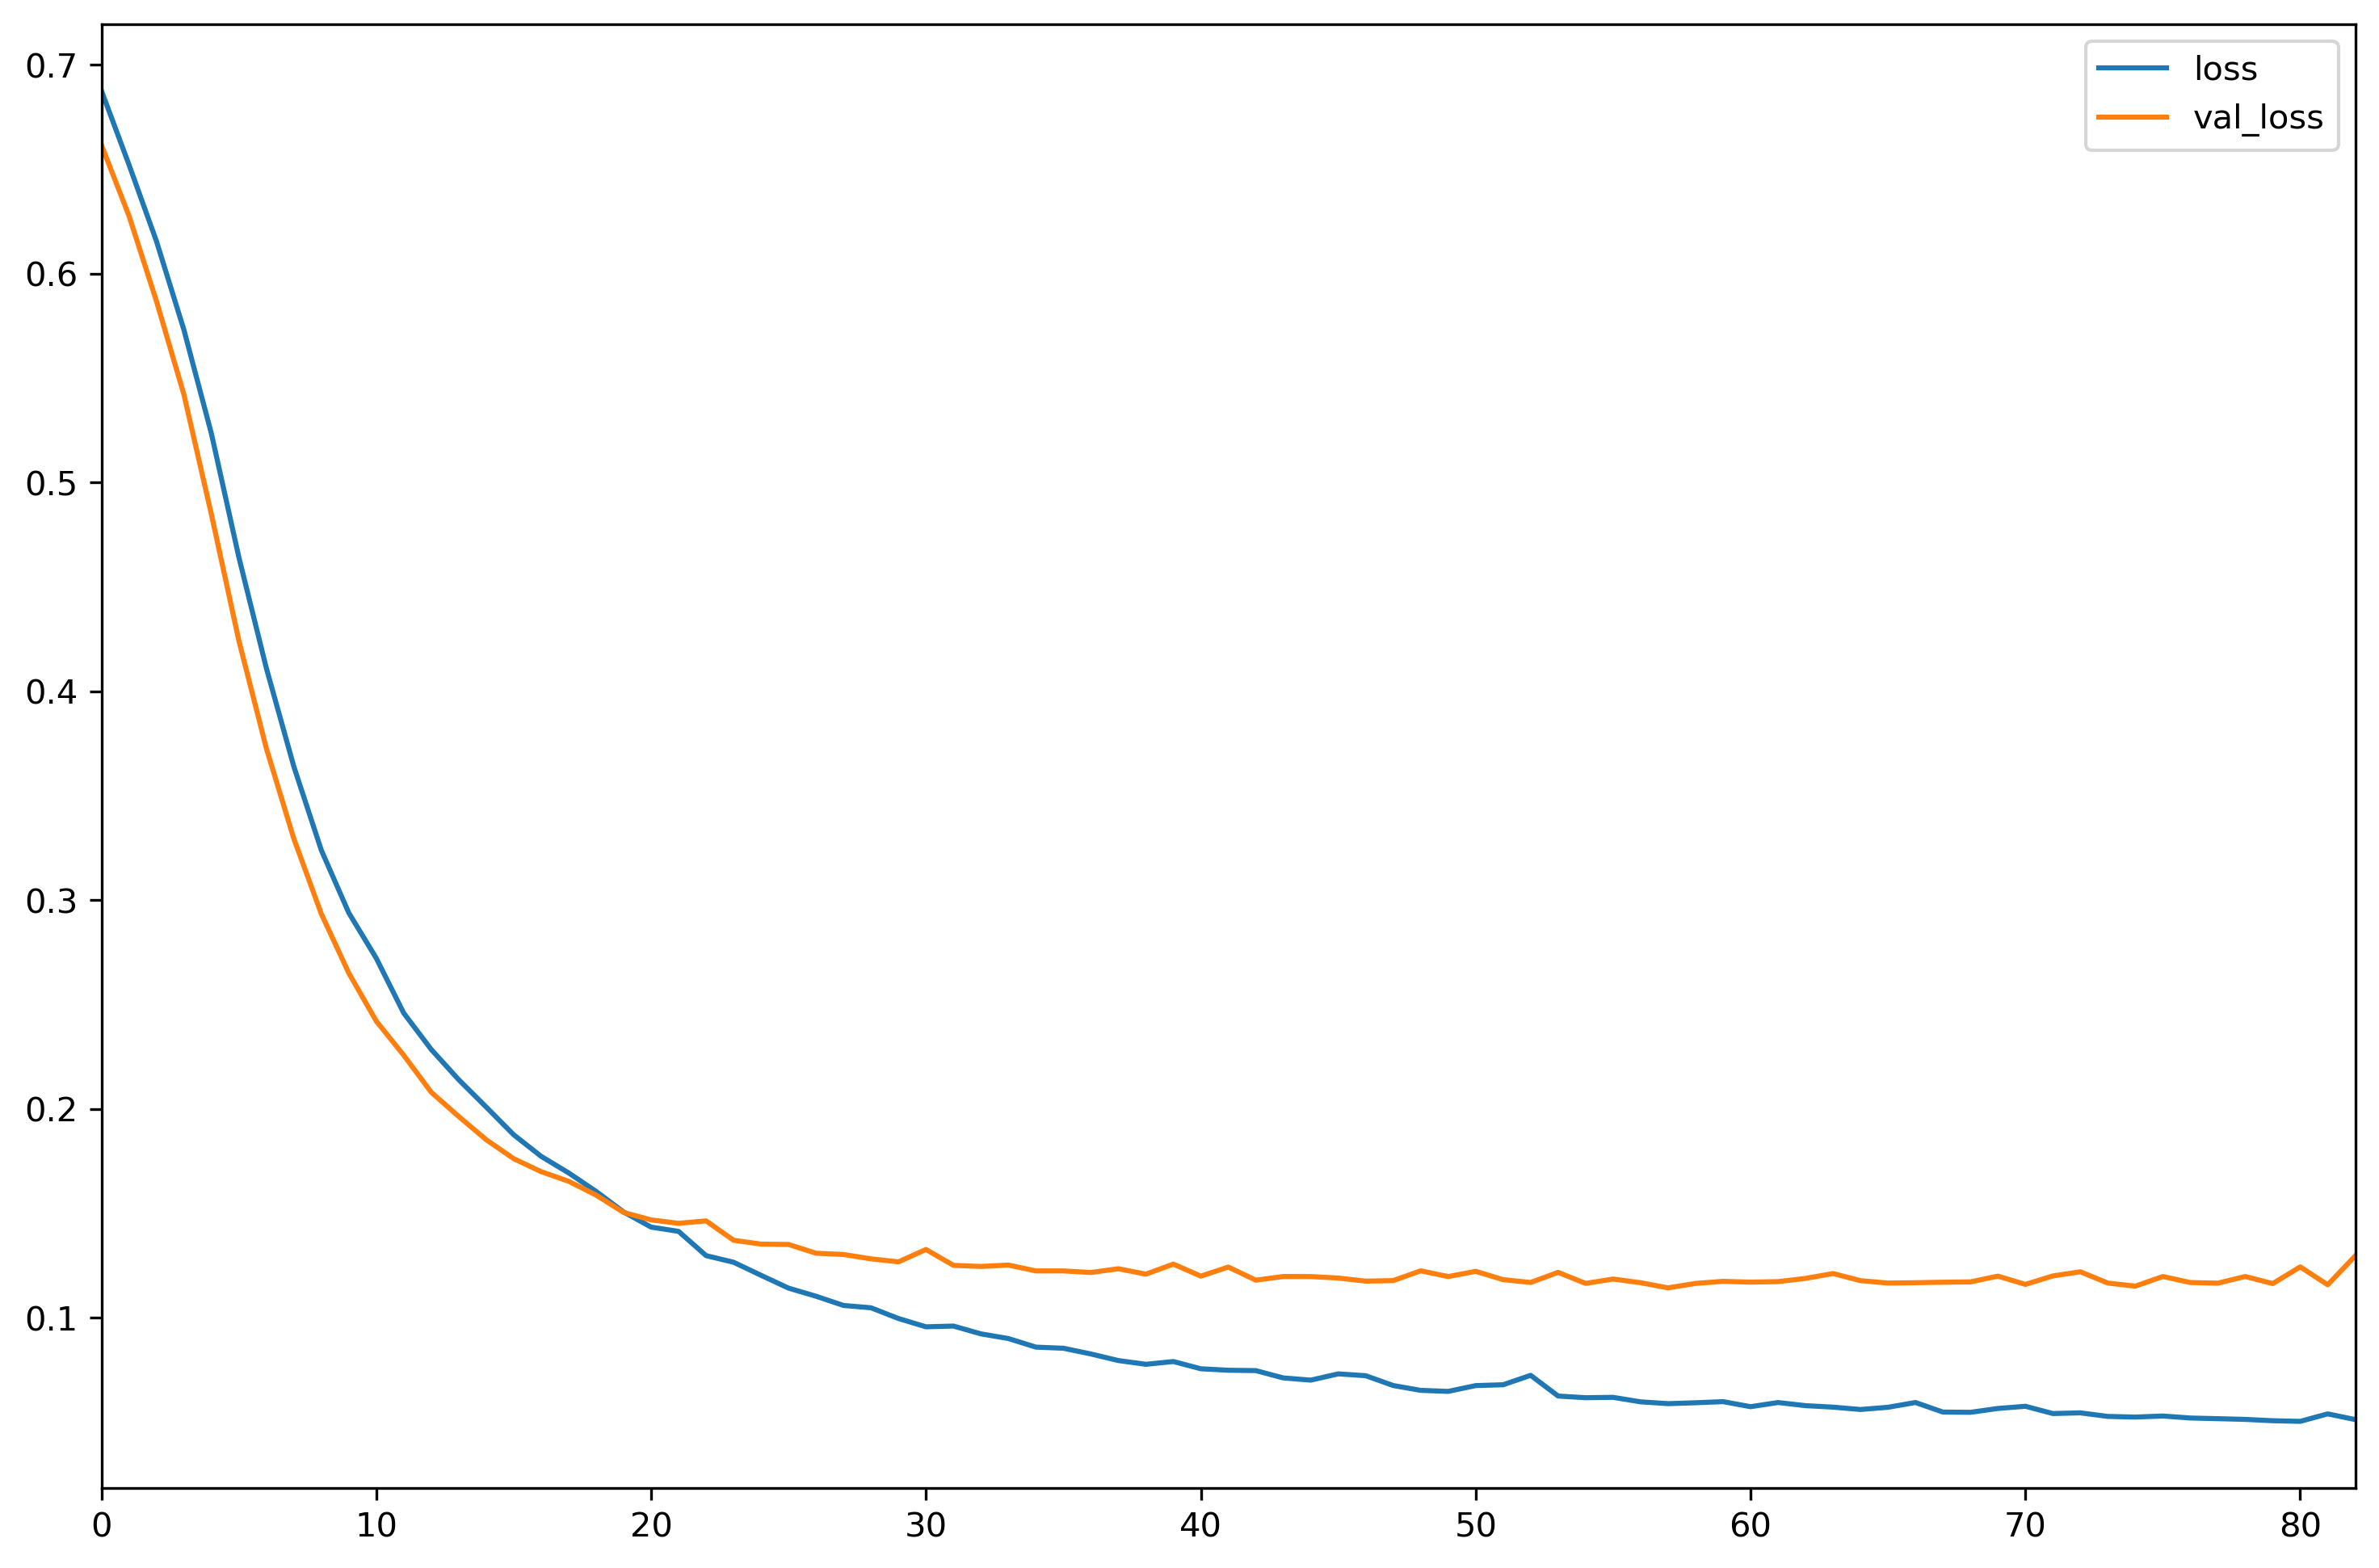

In [42]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot();

This plot is much better as we have a flattening behaviour for both the losses and now we stop at the point where the validation loss starts to increase.

In [43]:
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dropout(rate=0.5)) # The rate of neurons to turn off after each batch

# We reduce the number of neurons
model.add(Dense(15, activation="relu"))
model.add(Dropout(rate=0.5))

# For our last layer(Prediction) we select the sigmoid for binary classification
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
             loss="binary_crossentropy")

In [44]:
model.fit(x=X_train, y=y_train,
         epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 877us/sample - loss: 0.7141 - val_loss: 0.6892
Epoch 2/600
426/426 [==============================] - 0s 56us/sample - loss: 0.6985 - val_loss: 0.6708
Epoch 3/600
426/426 [==============================] - 0s 52us/sample - loss: 0.6810 - val_loss: 0.6583
Epoch 4/600
426/426 [==============================] - 0s 56us/sample - loss: 0.6661 - val_loss: 0.6429
Epoch 5/600
426/426 [==============================] - 0s 47us/sample - loss: 0.6342 - val_loss: 0.6208
Epoch 6/600
426/426 [==============================] - 0s 56us/sample - loss: 0.6225 - val_loss: 0.5912
Epoch 7/600
426/426 [==============================] - 0s 56us/sample - loss: 0.6004 - val_loss: 0.5565
Epoch 8/600
426/426 [==============================] - 0s 56us/sample - loss: 0.5716 - val_loss: 0.5216
Epoch 9/600
426/426 [==============================] - 0s 54us/sample - loss: 0.5443 - val_loss: 0.4886
Epoch 10/600
426/

426/426 [==============================] - 0s 54us/sample - loss: 0.1495 - val_loss: 0.0991
Epoch 79/600
426/426 [==============================] - 0s 56us/sample - loss: 0.1251 - val_loss: 0.0933
Epoch 80/600
426/426 [==============================] - 0s 56us/sample - loss: 0.1331 - val_loss: 0.0998
Epoch 81/600
426/426 [==============================] - 0s 59us/sample - loss: 0.1197 - val_loss: 0.0999
Epoch 82/600
426/426 [==============================] - 0s 63us/sample - loss: 0.1118 - val_loss: 0.0924
Epoch 83/600
426/426 [==============================] - 0s 54us/sample - loss: 0.1318 - val_loss: 0.0965
Epoch 84/600
426/426 [==============================] - 0s 59us/sample - loss: 0.1218 - val_loss: 0.0964
Epoch 85/600
426/426 [==============================] - 0s 52us/sample - loss: 0.1099 - val_loss: 0.0924
Epoch 86/600
426/426 [==============================] - 0s 54us/sample - loss: 0.1134 - val_loss: 0.1022
Epoch 87/600
426/426 [==============================] - 0s 52us/samp

426/426 [==============================] - 0s 61us/sample - loss: 0.0651 - val_loss: 0.0862
Epoch 156/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0920 - val_loss: 0.0934
Epoch 157/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0863 - val_loss: 0.0860
Epoch 158/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0966 - val_loss: 0.0982
Epoch 159/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0799 - val_loss: 0.0839
Epoch 160/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0847 - val_loss: 0.1101
Epoch 161/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0699 - val_loss: 0.0850
Epoch 162/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0772 - val_loss: 0.0847
Epoch 163/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0739 - val_loss: 0.0971
Epoch 164/600
426/426 [==============================] - 0s 

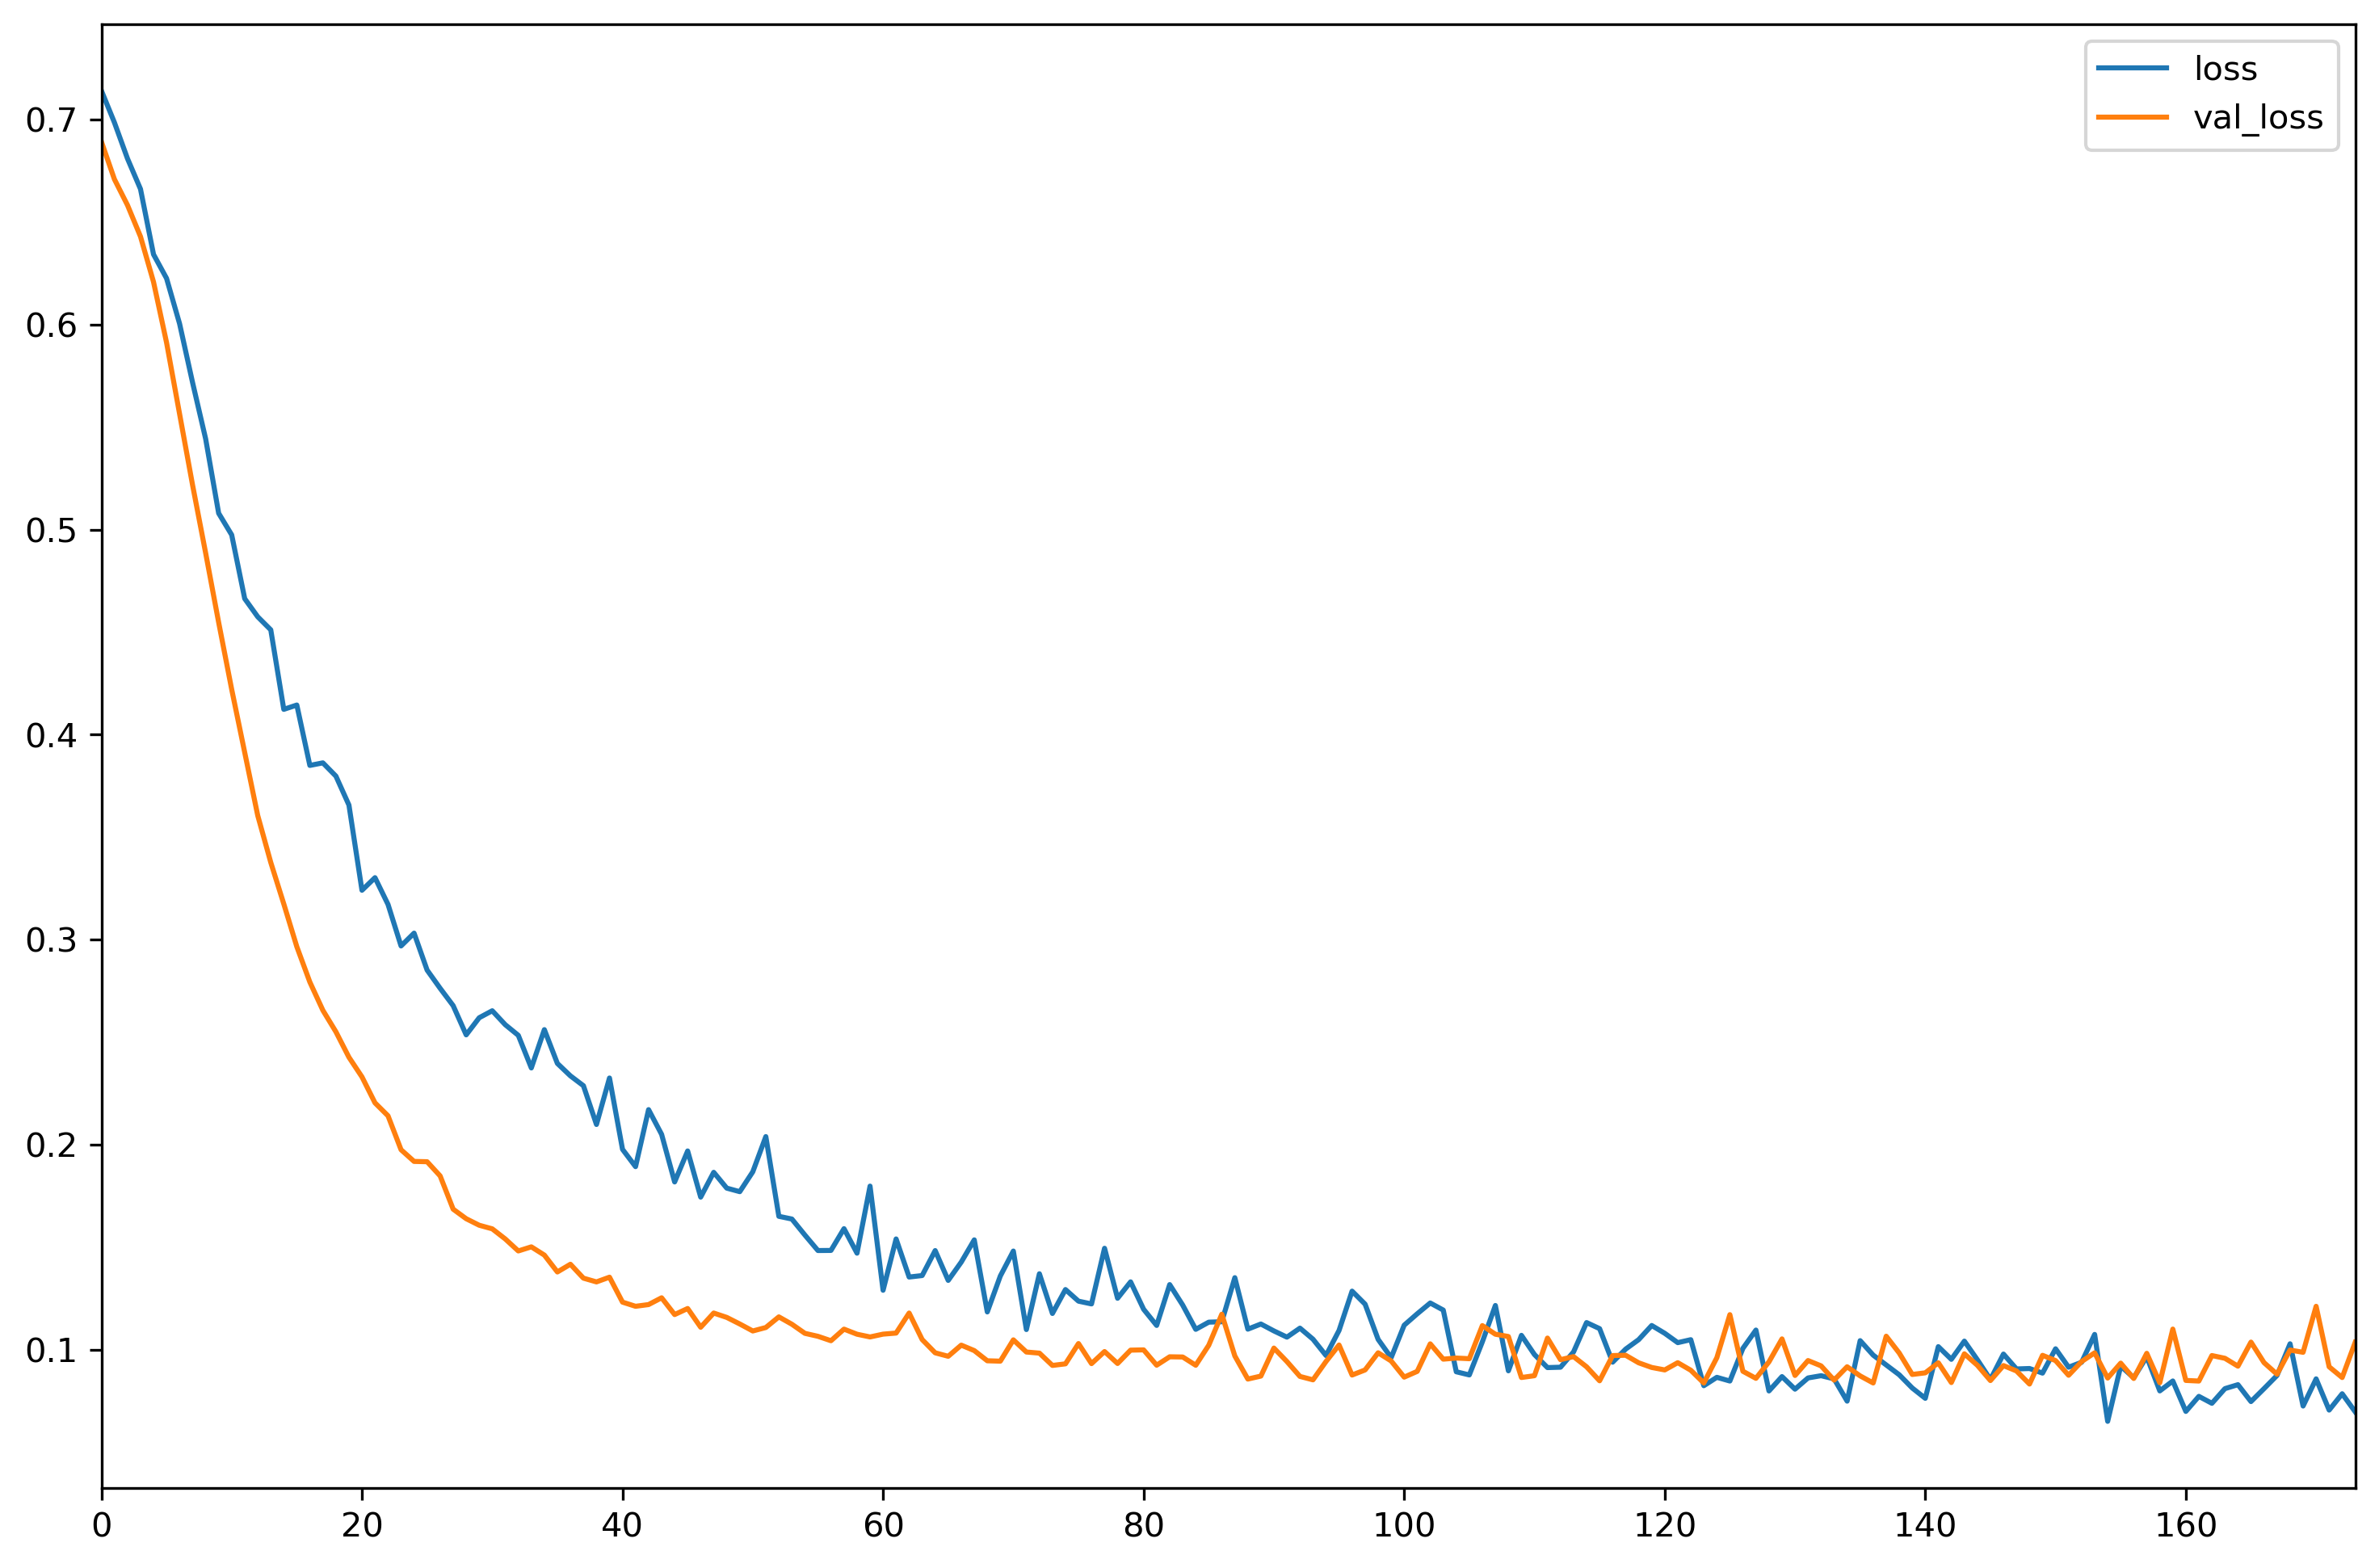

In [46]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot();

This result is even better. We can first notice that we ran 174 epochs instead of 83, which allows the model to train more. We can then observe, from the losses plot, that the behaviour of the losses is much better as well. Both the losses are decreasing and flatten out at the same rate which is a great behaviour to see.

In [48]:
predictions = model.predict_classes(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [51]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 4 84]]
